In [1]:
import subprocess
from io import BytesIO
from pathlib import Path
from zipfile import ZipFile

import requests
import geopandas as gd
import pandas as pd
import numpy as np

In [2]:
BASE_DIR = Path().cwd().parent
DATA_DIR = BASE_DIR.joinpath("data")
INPUT_DIR = DATA_DIR.joinpath("raw")
OUTPUT_DIR = DATA_DIR.joinpath("processed")
LOCAL_SHP_DIR = BASE_DIR.joinpath("shp")

## Extract

In [3]:
# Crosswalk Between 2010 and 2020 US Census Tracts 
# CENSUS_CROSSWALK_URL = "https://opportunityinsights.org/wp-content/uploads/2021/05/us_tract_2010_2020_crosswalk.csv"

In [4]:
# Neighborhood Characteristics by Census Tract 
NEIGHBORHOOD_DATA_URL = "https://opportunityinsights.org/wp-content/uploads/2018/10/tract_covariates.csv"

# All Outcomes by Census Tract, Race, Gender and Parental Income Percentile 
OUTCOMES_DATA_URL = "https://opportunityinsights.org/wp-content/uploads/2018/10/tract_outcomes.zip"

Source: https://opportunityinsights.org/data/?geographic_level=99&topic=0&paper_id=0#resource-listing

In [5]:
for directory in [DATA_DIR, INPUT_DIR, OUTPUT_DIR]:
    Path.mkdir(directory, exist_ok=True)

In [6]:
neighborhood_csv = INPUT_DIR.joinpath("tract_covariates.csv")
outcomes_csv = INPUT_DIR.joinpath("tract_outcomes_early.csv")

In [7]:
if not neighborhood_csv.exists():
    print("fetching neighborhood data...")
    csv_res = requests.get(NEIGHBORHOOD_DATA_URL)
    if csv_res.ok:
        print(f"  saving to {neighborhood_csv}...")
        with open(neighborhood_csv, "w") as f:
            f.write(csv_res.text)

fetching neighborhood data...
  saving to /Users/cotopaxi/Code/Projects/outlier/data/raw/tract_covariates.csv...


In [8]:
pd.read_csv(neighborhood_csv, nrows=5)

,state,county,tract,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2000,frac_coll_plus2010,foreign_share2010,...,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013
0,1,1,20100,11101,Montgomery,68638.727,26.171911,0.156479,0.254428,0.009950,...,0.250980,0.273034,0.567308,83.500000,0.038233,10109,3396,504.75183,-0.006769,92.133049
1,1,1,20200,11101,Montgomery,57242.512,24.806705,0.146932,0.267194,0.016337,...,0.392523,0.152040,0.493169,81.300003,0.089306,9948,3328,1682.17050,-0.004253,971.317870
2,1,1,20300,11101,Montgomery,75647.727,25.322525,0.224413,0.164159,0.027096,...,0.244856,0.205534,0.578560,79.500000,-0.177743,10387,3230,1633.41390,0.014218,340.920070
3,1,1,20400,11101,Montgomery,74852.055,22.965347,0.230469,0.252744,0.015083,...,0.190722,0.350673,0.596501,83.500000,-0.072311,12933,3635,1780.03250,-0.019841,207.386370
4,1,1,20500,11101,Montgomery,96174.766,26.222353,0.321154,0.375063,0.046488,...,0.168000,0.250496,0.661268,77.300003,-0.096140,12933,3635,2446.26220,0.018627,800.272640


In [9]:
if not outcomes_csv.exists():
    print("fetching outcomes data... (warning: large dataset!)")
    zip_res = requests.get(OUTCOMES_DATA_URL)
    if zip_res.ok:
        print(f"  saving to {outcomes_csv}...")
        outcome_zip = ZipFile(BytesIO(zip_res.content))
        outcome_zip.extractall(INPUT_DIR)

fetching outcomes data... (warning: large dataset!)
  saving to /Users/cotopaxi/Code/Projects/outlier/data/raw/tract_outcomes_early.csv...


In [10]:
pd.read_csv(outcomes_csv, nrows=5)

,state,county,tract,kir_natam_female_p1,kir_natam_female_p25,kir_natam_female_p50,kir_natam_female_p75,kir_natam_female_p100,kir_natam_female_n,kir_natam_female_mean,...,jail_white_pooled_mean_se,kfr_white_pooled_mean_se,staytract_white_pooled_mean_se,staycz_white_pooled_mean_se,stayhome_white_pooled_mean_se,working_white_pooled_mean_se,kir_stycz_white_pooled_mean_se,kfr_stycz_white_pooled_mean_se,spouse_rk_white_pooled_mean_se,par_rank_white_pooled_mean_se
0,1,1,20100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.007490,0.014829,0.020353,0.025752,0.019710,0.025348,0.018290,0.017890,0.018882,0.013778
1,1,1,20200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003828,0.020797,0.028821,0.041338,0.028252,0.029613,0.030380,0.028010,0.025328,0.021874
2,1,1,20300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002141,0.011726,0.016670,0.022392,0.015206,0.019161,0.015177,0.015285,0.016145,0.009353
3,1,1,20400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001777,0.010787,0.016027,0.019096,0.012477,0.016844,0.014253,0.014508,0.014396,0.009628
4,1,1,20500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000983,0.008789,0.012861,0.017491,0.010930,0.014396,0.011836,0.012748,0.010329,0.006667


## Transform

In [11]:
geo_df = gd.read_file(LOCAL_SHP_DIR.joinpath("nhgis0001_shapefile_tl2010_us_tract_2010.zip"))
geo_df.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GISJOIN,Shape_area,Shape_len,geometry
0,06,083,002402,06083002402,24.02,Census Tract 24.02,G5020,S,16288573,44468,+34.9287963,-120.4780833,G0600830002402,1.633304e+07,19109.934868,"POLYGON ((-2190454.484 -1818.340, -2190458.553..."
1,06,083,002102,06083002102,21.02,Census Tract 21.02,G5020,S,1352551,0,+34.9421111,-120.4267767,G0600830002102,1.352547e+06,4958.900746,"POLYGON ((-2187515.087 -3474.486, -2187572.399..."
2,06,083,002009,06083002009,20.09,Census Tract 20.09,G5020,S,2603281,0,+34.8722878,-120.4277159,G0600830002009,2.603279e+06,6578.282432,"POLYGON ((-2189494.128 -10631.359, -2189516.12..."
3,06,083,002008,06083002008,20.08,Census Tract 20.08,G5020,S,3295314,0,+34.8861824,-120.4250770,G0600830002008,3.295312e+06,8848.654446,"POLYGON ((-2189029.408 -9557.208, -2189024.501..."
4,06,011,000500,06011000500,5,Census Tract 5,G5020,S,170218418,4285285,+39.3147440,-121.9636465,G0600110000500,1.745037e+08,78247.144082,"POLYGON ((-2192298.375 513039.620, -2192185.26..."


In [12]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73669 entries, 0 to 73668
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   73669 non-null  object  
 1   COUNTYFP10  73669 non-null  object  
 2   TRACTCE10   73669 non-null  object  
 3   GEOID10     73669 non-null  object  
 4   NAME10      73669 non-null  object  
 5   NAMELSAD10  73669 non-null  object  
 6   MTFCC10     73669 non-null  object  
 7   FUNCSTAT10  73669 non-null  object  
 8   ALAND10     73669 non-null  int64   
 9   AWATER10    73669 non-null  int64   
 10  INTPTLAT10  73669 non-null  object  
 11  INTPTLON10  73669 non-null  object  
 12  GISJOIN     73669 non-null  object  
 13  Shape_area  73669 non-null  float64 
 14  Shape_len   73669 non-null  float64 
 15  geometry    73669 non-null  geometry
dtypes: float64(2), geometry(1), int64(2), object(11)
memory usage: 9.0+ MB


In [13]:
len(geo_df)

73669

Match `GEOID10` column of `geo_df` with subsequent data

In [14]:
neighborhood_df = pd.read_csv(neighborhood_csv, dtype={"state": str, "county": str, "tract": str, "cz": str})
neighborhood_df.head()

,state,county,tract,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2000,frac_coll_plus2010,foreign_share2010,...,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013
0,1,1,20100,11101,Montgomery,68638.727,26.171911,0.156479,0.254428,0.009950,...,0.250980,0.273034,0.567308,83.500000,0.038233,10109.0,3396.0,504.75183,-0.006769,92.133049
1,1,1,20200,11101,Montgomery,57242.512,24.806705,0.146932,0.267194,0.016337,...,0.392523,0.152040,0.493169,81.300003,0.089306,9948.0,3328.0,1682.17050,-0.004253,971.317870
2,1,1,20300,11101,Montgomery,75647.727,25.322525,0.224413,0.164159,0.027096,...,0.244856,0.205534,0.578560,79.500000,-0.177743,10387.0,3230.0,1633.41390,0.014218,340.920070
3,1,1,20400,11101,Montgomery,74852.055,22.965347,0.230469,0.252744,0.015083,...,0.190722,0.350673,0.596501,83.500000,-0.072311,12933.0,3635.0,1780.03250,-0.019841,207.386370
4,1,1,20500,11101,Montgomery,96174.766,26.222353,0.321154,0.375063,0.046488,...,0.168000,0.250496,0.661268,77.300003,-0.096140,12933.0,3635.0,2446.26220,0.018627,800.272640


In [15]:
neighborhood_df["state"] = neighborhood_df["state"].apply(lambda x: "0" + x if len(x) < 2 else x)
neighborhood_df["county"] = neighborhood_df["county"].apply(lambda x: "0" + x if len(x) < 3 else x)
neighborhood_df["tract"] = neighborhood_df["tract"].apply(lambda x: "0" + x if len(x) < 6 else x)
neighborhood_df["GEOID10"] = neighborhood_df["state"] + neighborhood_df["county"] + neighborhood_df["tract"]
neighborhood_df.head()

,state,county,tract,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2000,frac_coll_plus2010,foreign_share2010,...,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013,GEOID10
0,01,01,020100,11101,Montgomery,68638.727,26.171911,0.156479,0.254428,0.009950,...,0.273034,0.567308,83.500000,0.038233,10109.0,3396.0,504.75183,-0.006769,92.133049,0101020100
1,01,01,020200,11101,Montgomery,57242.512,24.806705,0.146932,0.267194,0.016337,...,0.152040,0.493169,81.300003,0.089306,9948.0,3328.0,1682.17050,-0.004253,971.317870,0101020200
2,01,01,020300,11101,Montgomery,75647.727,25.322525,0.224413,0.164159,0.027096,...,0.205534,0.578560,79.500000,-0.177743,10387.0,3230.0,1633.41390,0.014218,340.920070,0101020300
3,01,01,020400,11101,Montgomery,74852.055,22.965347,0.230469,0.252744,0.015083,...,0.350673,0.596501,83.500000,-0.072311,12933.0,3635.0,1780.03250,-0.019841,207.386370,0101020400
4,01,01,020500,11101,Montgomery,96174.766,26.222353,0.321154,0.375063,0.046488,...,0.250496,0.661268,77.300003,-0.096140,12933.0,3635.0,2446.26220,0.018627,800.272640,0101020500


In [16]:
neighborhood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74044 entries, 0 to 74043
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   state                         74044 non-null  object 
 1   county                        74044 non-null  object 
 2   tract                         74044 non-null  object 
 3   cz                            73094 non-null  object 
 4   czname                        73094 non-null  object 
 5   hhinc_mean2000                72393 non-null  float64
 6   mean_commutetime2000          72417 non-null  float64
 7   frac_coll_plus2000            72464 non-null  float64
 8   frac_coll_plus2010            73248 non-null  float64
 9   foreign_share2010             72378 non-null  float64
 10  med_hhinc1990                 72420 non-null  float64
 11  med_hhinc2016                 72954 non-null  float64
 12  popdensity2000                72739 non-null  float64
 13  p

Check the length of the data for validation

In [17]:
len(neighborhood_df)

74044

In [18]:
outcomes_df = pd.read_csv(outcomes_csv, dtype={"state": str, "county": str, "tract": str})
outcomes_df.head()

/var/folders/gj/8bjgpvcd4dqcncs3mnr31vk80000gn/T/ipykernel_72907/2634423662.py:1: DtypeWarning: Columns (5703) have mixed types. Specify dtype option on import or set low_memory=False.
  outcomes_df = pd.read_csv(outcomes_csv, dtype={"state": str, "county": str, "tract": str})


,state,county,tract,kir_natam_female_p1,kir_natam_female_p25,kir_natam_female_p50,kir_natam_female_p75,kir_natam_female_p100,kir_natam_female_n,kir_natam_female_mean,...,jail_white_pooled_mean_se,kfr_white_pooled_mean_se,staytract_white_pooled_mean_se,staycz_white_pooled_mean_se,stayhome_white_pooled_mean_se,working_white_pooled_mean_se,kir_stycz_white_pooled_mean_se,kfr_stycz_white_pooled_mean_se,spouse_rk_white_pooled_mean_se,par_rank_white_pooled_mean_se
0,1,1,20100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.007490,0.014829,0.020353,0.025752,0.019710,0.025348,0.018290,0.017890,0.018882,0.013778
1,1,1,20200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003828,0.020797,0.028821,0.041338,0.028252,0.029613,0.030380,0.028010,0.025328,0.021874
2,1,1,20300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002141,0.011726,0.016670,0.022392,0.015206,0.019161,0.015177,0.015285,0.016145,0.009353
3,1,1,20400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001777,0.010787,0.016027,0.019096,0.012477,0.016844,0.014253,0.014508,0.014396,0.009628
4,1,1,20500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000983,0.008789,0.012861,0.017491,0.010930,0.014396,0.011836,0.012748,0.010329,0.006667


In [19]:
outcomes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73278 entries, 0 to 73277
Columns: 7825 entries, state to par_rank_white_pooled_mean_se
dtypes: float64(7821), object(4)
memory usage: 4.3+ GB


In [20]:
outcomes_df["state"] = outcomes_df["state"].apply(lambda x: "0" + x if len(x) < 2 else x)
outcomes_df["county"] = outcomes_df["county"].apply(lambda x: "0" + x if len(x) < 3 else x)
outcomes_df["tract"] = outcomes_df["tract"].apply(lambda x: "0" + x if len(x) < 6 else x)
outcomes_df["GEOID10"] = outcomes_df["state"] + outcomes_df["county"] + outcomes_df["tract"]
outcomes_df.head()

,state,county,tract,kir_natam_female_p1,kir_natam_female_p25,kir_natam_female_p50,kir_natam_female_p75,kir_natam_female_p100,kir_natam_female_n,kir_natam_female_mean,...,kfr_white_pooled_mean_se,staytract_white_pooled_mean_se,staycz_white_pooled_mean_se,stayhome_white_pooled_mean_se,working_white_pooled_mean_se,kir_stycz_white_pooled_mean_se,kfr_stycz_white_pooled_mean_se,spouse_rk_white_pooled_mean_se,par_rank_white_pooled_mean_se,GEOID10
0,01,01,020100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.014829,0.020353,0.025752,0.019710,0.025348,0.018290,0.017890,0.018882,0.013778,0101020100
1,01,01,020200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.020797,0.028821,0.041338,0.028252,0.029613,0.030380,0.028010,0.025328,0.021874,0101020200
2,01,01,020300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.011726,0.016670,0.022392,0.015206,0.019161,0.015177,0.015285,0.016145,0.009353,0101020300
3,01,01,020400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.010787,0.016027,0.019096,0.012477,0.016844,0.014253,0.014508,0.014396,0.009628,0101020400
4,01,01,020500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.008789,0.012861,0.017491,0.010930,0.014396,0.011836,0.012748,0.010329,0.006667,0101020500


Verify data length

In [21]:
len(outcomes_df)

73278

Based on the Opportunity Atlas map, there are ~1,000ish tracts that do not have outcome data likely do to low populations (think rural areas.) We'll drop these out of the data but want to account for this edge case in the interactive.

### Join data

First we'll join the CSV files together. We have more neighborhood tracts than outcome tracts so we should drop anything we don't have in our outcome data. We use a left join to keep all outcome tracts.

In [22]:
print("Merging all opportunity atlas data...")
nbr_outcome_df = pd.merge(
    outcomes_df,
    neighborhood_df,
    how="left",
    on=["GEOID10", "state", "county", "tract"],
    validate="one_to_one"
)

Merging all opportunity atlas data...


We should probably cut down the total column count here

In [23]:
len(nbr_outcome_df.columns)

7861

In [24]:
nbr_outcome_df.head()

,state,county,tract,kir_natam_female_p1,kir_natam_female_p25,kir_natam_female_p50,kir_natam_female_p75,kir_natam_female_p100,kir_natam_female_n,kir_natam_female_mean,...,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013
0,01,01,020100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.250980,0.273034,0.567308,83.500000,0.038233,10109.0,3396.0,504.75183,-0.006769,92.133049
1,01,01,020200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.392523,0.152040,0.493169,81.300003,0.089306,9948.0,3328.0,1682.17050,-0.004253,971.317870
2,01,01,020300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.244856,0.205534,0.578560,79.500000,-0.177743,10387.0,3230.0,1633.41390,0.014218,340.920070
3,01,01,020400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.190722,0.350673,0.596501,83.500000,-0.072311,12933.0,3635.0,1780.03250,-0.019841,207.386370
4,01,01,020500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.168000,0.250496,0.661268,77.300003,-0.096140,12933.0,3635.0,2446.26220,0.018627,800.272640


In [25]:
nbr_outcome_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73278 entries, 0 to 73277
Columns: 7861 entries, state to job_density_2013
dtypes: float64(7854), object(7)
memory usage: 4.3+ GB


How many items did we join

In [26]:
len(nbr_outcome_df) == len(outcomes_df)

True

### Adding geo data

Now, we'll join our geo data to our opportunity insights data

In [27]:
print("Merging opportunity atlas data with geometry...")
merge_geo_df = geo_df[["GEOID10", "geometry"]].merge(
    nbr_outcome_df,
    on="GEOID10",
    how="inner",
    validate="one_to_one",
)

Merging opportunity atlas data with geometry...


In [28]:
merge_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 50467 entries, 0 to 50466
Columns: 7862 entries, GEOID10 to job_density_2013
dtypes: float64(7854), geometry(1), object(7)
memory usage: 3.0+ GB


NHGIS uses the albersUSA map projection for all data so we'll need to convert it to wgs 84 to work w/ web maps and make it generally easier to interop w/ other geo tools

In [29]:
merge_geo_df.crs

<Derived Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

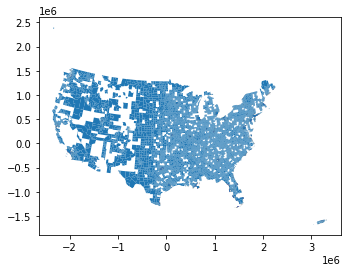

In [30]:
merge_geo_df.plot()

projecting to WGS 84...


<AxesSubplot:>

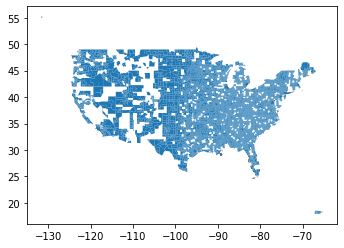

In [31]:
merge_geo_df = merge_geo_df.set_geometry("geometry")
print("projecting to WGS 84...")
projected_geo_df = merge_geo_df.to_crs("EPSG:4326")
projected_geo_df.plot()

In [32]:
projected_geo_df[["GEOID10","geometry"]].head()

,GEOID10,geometry
0,06083980000,"POLYGON ((-119.83224 34.43891, -119.83064 34.4..."
1,06053014700,"POLYGON ((-121.68016 36.83088, -121.68041 36.8..."
2,06053014500,"POLYGON ((-121.64141 36.67774, -121.64101 36.6..."
3,06053014800,"POLYGON ((-121.40699 36.65604, -121.40592 36.6..."
4,06053011203,"POLYGON ((-121.23589 36.32057, -121.23581 36.3..."


In [33]:
projected_geo_df.head()

,GEOID10,geometry,state,county,tract,kir_natam_female_p1,kir_natam_female_p25,kir_natam_female_p50,kir_natam_female_p75,kir_natam_female_p100,...,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013
0,06083980000,"POLYGON ((-119.83224 34.43891, -119.83064 34.4...",06,083,980000,NaN,NaN,NaN,NaN,NaN,...,0.250000,NaN,0.568481,100.000000,NaN,33147.0,20603.0,5.790388,0.016284,1138.390300
1,06053014700,"POLYGON ((-121.68016 36.83088, -121.68041 36.8...",06,053,014700,NaN,NaN,NaN,NaN,NaN,...,0.196970,0.107176,0.642056,82.300003,NaN,7119.0,2835.0,558.838440,0.011141,48.033092
2,06053014500,"POLYGON ((-121.64141 36.67774, -121.64101 36.6...",06,053,014500,NaN,NaN,NaN,NaN,NaN,...,0.265795,0.558435,0.563672,75.199997,NaN,53318.0,19457.0,822.454280,-0.017505,3161.134000
3,06053014800,"POLYGON ((-121.40699 36.65604, -121.40592 36.6...",06,053,014800,NaN,NaN,NaN,NaN,NaN,...,0.175167,0.224213,0.544849,70.500000,NaN,3555.0,805.0,57.056438,-0.023409,27.146618
4,06053011203,"POLYGON ((-121.23589 36.32057, -121.23581 36.3...",06,053,011203,NaN,NaN,NaN,NaN,NaN,...,0.170247,0.220046,0.545064,68.900002,NaN,3489.0,737.0,10261.803000,0.090242,812.589420


Our data has over 7,000 columns, making it near impossible to export at its given size. For now, we'll export a single data port to ease development and then refine this notebook to pull out exactly what we need and drop the rest.

## Load

Now that we have the data we need, we'll select a single outcome for testing/dev and export the final dataset.

[Opportunity Atlas](https://opportunityinsights.org/wp-content/uploads/2019/07/Codebook-for-Table-4.pdf) uses a nested structure to create columns like the following:

```
[outcome]_[race]_[gender]_p[pctile]
```

So, we'll pre-compute these columns for a single measure and then export the data as geojson

In [34]:
base_cols = ["GEOID10", "state", "county", "tract"]
geo_cols = ["geometry"]

In [35]:
race = [
#     "pooled", 
    "white", 
    "black", 
#     "hisp", 
#     "asian", 
#     "natam", 
#     "other",
]
gender = [
    "pooled",
#     "male", 
#     "female",
]
pctile = [
#     "1", 
#     "25", 
#     "50", 
    "75", 
#     "100",
]
outcome = [
#     "kfr",
#     "kfr_top01",
#     "kfr_top20",
    "kir",
#     "kir_top01",
#     "kir_top20",
]

In [36]:
mean_predicted_income_cols =  np.array(
    [[[[f"{o}_{r}_{g}_p{p}" for o in outcome] for p in pctile] for r in race] for g in gender]
).flatten().tolist()

In [37]:
projected_geo_df[base_cols + mean_predicted_income_cols + geo_cols].head()

,GEOID10,state,county,tract,kir_white_pooled_p75,kir_black_pooled_p75,geometry
0,06083980000,06,083,980000,NaN,NaN,"POLYGON ((-119.83224 34.43891, -119.83064 34.4..."
1,06053014700,06,053,014700,0.516335,NaN,"POLYGON ((-121.68016 36.83088, -121.68041 36.8..."
2,06053014500,06,053,014500,0.588983,NaN,"POLYGON ((-121.64141 36.67774, -121.64101 36.6..."
3,06053014800,06,053,014800,0.602529,NaN,"POLYGON ((-121.40699 36.65604, -121.40592 36.6..."
4,06053011203,06,053,011203,0.454226,NaN,"POLYGON ((-121.23589 36.32057, -121.23581 36.3..."


Export to geojson

In [39]:
import fiona; fiona.supported_drivers

{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [40]:
output_geojson = INPUT_DIR.joinpath("dev-tracts-geo.json")
print("Exporting geojson...")
projected_geo_df[
    base_cols + mean_predicted_income_cols + geo_cols
].to_file(output_geojson, driver="GeoJSON")

Exporting geojson...


/Users/cotopaxi/.local/share/virtualenvs/outlier-aYHeDvLw/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


We have a file but it's HUGE! (~1.4 GB.) Most of this can be attributed to the geometry. Let's simplify it and export it as topojson.

We _could_ use geopandas for this but I find [mapshaper](https://github.com/mbloch/mapshaper) much better at handling simplification algorithims and general munging of geo data outside of the memory-intensive join steps.

### generate geojson

In [43]:
dev_geojson = OUTPUT_DIR.joinpath("dev-tracts-simplified-geo.json")

In [47]:
# npx mapshaper-xl -i data/processed/dev-tracts-geo.json -simplify 16.9% -o data/processed/dev-tracts-simplified-geo.json format=geojson
cmd = subprocess.run([
    "npx", "mapshaper-xl", 
        "-i", output_geojson,
        "-simplify", "16.9%",
        "-o", dev_geojson,
], capture_output=True)

print(f"Generated {dev_geojson}")

generated /Users/cotopaxi/Code/Projects/outlier/data/processed/dev-tracts-simplified-geo.json


### generate topojson

In [48]:
dev_topojson = OUTPUT_DIR.joinpath("dev-tracts-simplified-topo.json")

In [49]:
cmd = subprocess.run([
    "npx", "mapshaper-xl", 
        "-i", output_geojson,
        "-simplify", "16.9%",
        "-o", dev_topojson,
            "format=topojson"
], capture_output=True)

print(f"Generated {dev_topojson}")

Generated /Users/cotopaxi/Code/Projects/outlier/data/processed/dev-tracts-simplified-topo.json
